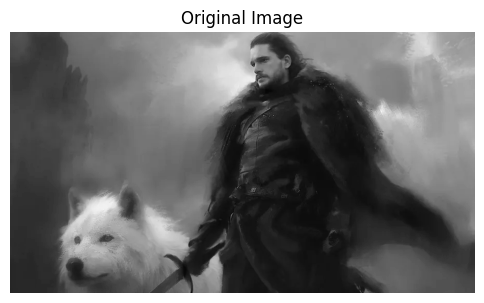

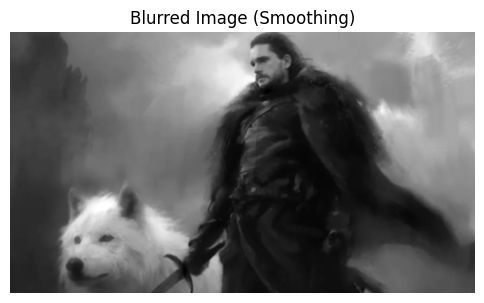

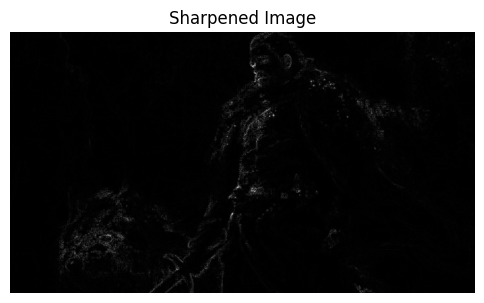

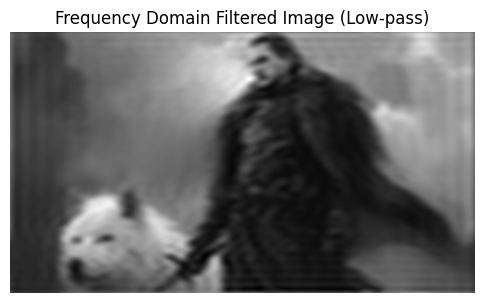

True

In [1]:
import cv2, numpy as np, matplotlib.pyplot as plt

def display_image(image, title="Image"): plt.figure(figsize=(6, 6)); plt.imshow(image, cmap='gray'); plt.title(title); plt.axis('off'); plt.show()

def apply_spatial_filters(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sharpened = cv2.convertScaleAbs(laplacian)
    return blurred, sharpened

def apply_frequency_filters(image):
    dft_shift = np.fft.fftshift(np.fft.fft2(image))
    rows, cols = image.shape
    mask = np.zeros((rows, cols), np.uint8)
    mask[rows//2-30:rows//2+30, cols//2-30:cols//2+30] = 1
    f_ishift = np.fft.ifftshift(dft_shift * mask)
    img_back = np.fft.ifft2(f_ishift)
    return np.abs(img_back)

# Load image in grayscale
image = cv2.imread('p4.jpg', cv2.IMREAD_GRAYSCALE)

# Apply spatial filters (smoothing and sharpening)
blurred_image, sharpened_image = apply_spatial_filters(image)

# Apply frequency domain filter (low-pass filtering)
frequency_filtered_image = apply_frequency_filters(image)

# Display images
for img, title in zip([image, blurred_image, sharpened_image, frequency_filtered_image], 
                      ['Original Image', 'Blurred Image', 'Sharpened Image', 'Frequency Filtered Image']):
    display_image(img, title)

# Save enhanced images
cv2.imwrite('blurred_image.jpg', blurred_image)
cv2.imwrite('sharpened_image.jpg', sharpened_image)
cv2.imwrite('frequency_filtered_image.jpg', frequency_filtered_image)
